<a href="https://colab.research.google.com/github/Lishat/Transfer-Learning-using-Keras/blob/master/Transfer_Learning_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.optimizers import Adam
import os

In [2]:
pre_trained_model = ResNet50(input_shape=(300, 300, 3), include_top=False, weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [3]:
pre_trained_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 306, 306, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 150, 150, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [5]:
last_layer = pre_trained_model.get_layer('activation_48')
print(last_layer.output_shape)

(None, 10, 10, 2048)


In [6]:
x = layers.Flatten()(last_layer.output)
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation = 'sigmoid')(x)
final_model = Model(pre_trained_model.input, x)
# ##To run this code in tpu
# final_model = tf.contrib.tpu.keras_to_tpu_model(
#     Model(pre_trained_model.input, x),
#     strategy=tf.contrib.tpu.TPUDistributionStrategy(
#         tf.contrib.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
#     )
# )

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
final_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 306, 306, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 150, 150, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
final_model.compile(optimizer = tf.train.AdamOptimizer(learning_rate=0.001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [9]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /content/cats_and_dogs_filtered.zip

--2019-05-29 18:08:35--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 2404:6800:4003:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

/content/cats_and_d 100%[===================>]  65.43M  79.5MB/s    in 0.8s    

2019-05-29 18:08:37 (79.5 MB/s) - ‘/content/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import zipfile
local_zip = '/content/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/content/cats_and_dogs_filtered/train/', 
        target_size=(300, 300),  
        batch_size=128,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        '/content/cats_and_dogs_filtered/validation/',  
        target_size=(300, 300),  
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
history = final_model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
32/32 [==============================] - 12s 364ms/step - loss: 8.1063 - acc: 0.5000
 - 54s - loss: 2.6338 - acc: 0.8005 - val_loss: 8.1063 - val_acc: 0.5000
Epoch 2/20
32/32 [==============================] - 7s 221ms/step - loss: 8.0118 - acc: 0.5000
 - 43s - loss: 2.0050 - acc: 0.8735 - val_loss: 8.0118 - val_acc: 0.5000
Epoch 3/20
32/32 [==============================] - 7s 225ms/step - loss: 8.0118 - acc: 0.5000
 - 43s - loss: 1.5018 - acc: 0.9045 - val_loss: 8.0118 - val_acc: 0.5000
Epoch 4/20
32/32 [==============================] - 7s 225ms/step - loss: 8.0590 - acc: 0.5000
 - 46s - loss: 1.6002 - acc: 0.8980 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/20
32/32 [==============================] - 7s 224ms/step - loss: 8.0590 - acc: 0.5000
 - 43s - loss: 1.8757 - acc: 0.8815 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 6/20
32/32 [==============================] - 7s 223ms/step - loss: 8.0590 - acc: 0.5000
 - 45s - loss: 1

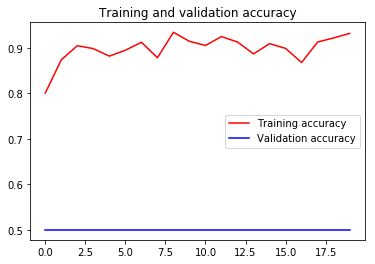

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()